In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import collections
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
#import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Function Definitions

In [2]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])


# Data Analysis

In [82]:
data = pd.read_csv('train.csv')

### Shape 

In [4]:
print(data.shape)

(1460, 81)


### Head

In [83]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Describe

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Check non-null columns

In [ ]:
#data.info()

### Replace values where NaN has meaning

In [84]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']
# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    data[col].fillna('None',inplace=True)

In [ ]:
#data.info()

### check skewness and kutosis

Skewness: 1.882876
Kurtosis: 6.536282


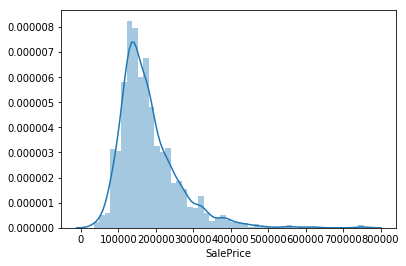

In [8]:
sns.distplot(data['SalePrice'])

print('Skewness: %f' % data['SalePrice'].skew())
print('Kurtosis: %f' % data['SalePrice'].kurt())

##### The data has high skewness -> Many houses were being sold for less than the average value
##### The data has high kurtosis -> Is a indicator that data has many outliers
#### The data SalePrice is not normally distributed, and many ML assume normal distribution, it can be a problem

In [ ]:
### check correlation between SalePrice and the other numerical features

In [11]:
# num_columns = data.select_dtypes(exclude=['object'])

In [4]:
# # Create a list of columns to drop and put the columns that have correlation small than 0.4
# lis_drop_num_columns = []
# lis_drop_num_columns.append('SalePrice')
# lis_drop_num_columns.append('Id')
# for col in data[num_columns.columns]:
#     corr = data[col].corr(data['SalePrice'])
#     if corr < 0.4:
#         lis_drop_num_columns.append(col)
#     print("column: %s, corr:  " % col,corr)

In [85]:
lis_drop_num_columns = ['SalePrice','Id']
X = data.drop(lis_drop_num_columns,axis=1)
Y = data[['SalePrice']]

# Handle Missing Data

In [86]:
num_columns = X.select_dtypes(exclude=['object'])
categ_columns = X.select_dtypes(['object'])
#Replace NAN in numerical column data by the mean of the column
X[num_columns.columns] = X[num_columns.columns].groupby(num_columns.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

In [87]:
def most_frequent_word(col):
    col = [x for x in col if str(x) != 'nan']
    counter = collections.Counter(col)
    return counter.most_common()[0][0]

In [88]:
for col in categ_columns:
    X[col].fillna(most_frequent_word(col),inplace=True)

In [89]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal


## Normalize numerical data

In [90]:
X[num_columns.columns] = preprocessing.scale(num_columns)

/home/larissa/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


## Using One-Hot encoding

In [91]:
#use one-hot encoding
one_hot_encoding = pd.get_dummies(categ_columns)

### Join categorical and numerical columns again

In [92]:
X_final = pd.concat([ X[num_columns.columns], one_hot_encoding], axis=1)

In [93]:
X_final.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=303)

In [94]:
data_final = pd.concat([X_final, Y], axis=1)

In [95]:
data_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,...,0,0,1,0,0,0,0,1,0,208500
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,...,0,0,1,0,0,0,0,1,0,181500
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,...,0,0,1,0,0,0,0,1,0,223500
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,...,0,0,1,1,0,0,0,0,0,140000
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,...,0,0,1,0,0,0,0,1,0,250000
5,-0.163109,0.615871,0.360616,-0.795151,-0.517200,0.719786,0.491040,-0.572835,0.632450,-0.288653,...,0,0,1,0,0,0,0,1,0,143000
6,-0.872563,0.203918,-0.043379,1.374795,-0.517200,1.084115,0.975575,0.454768,2.029558,-0.288653,...,0,0,1,0,0,0,0,1,0,307000
7,0.073375,NaN,-0.013513,0.651479,0.381743,0.057371,-0.574938,0.753104,0.910994,-0.090220,...,0,0,1,0,0,0,0,1,0,200000
8,-0.163109,-0.784768,-0.440659,0.651479,-0.517200,-1.333700,-1.689368,-0.572835,-0.973018,-0.288653,...,0,0,1,1,0,0,0,0,0,129900
9,3.147673,-0.825963,-0.310370,-0.795151,0.381743,-1.068734,-1.689368,-0.572835,0.893448,-0.288653,...,0,0,1,0,0,0,0,1,0,118000


In [104]:
data_final = data_final.dropna()

In [105]:
data_final.isnull().values.any()

False

In [106]:
X_fin2 = data_final.drop('SalePrice',axis=1)
Y_fin = data_final[['SalePrice']]

## Split train and test

In [107]:
#Split train x test
X_train, X_test, y_train, y_test = train_test_split(X_fin2, Y_fin, shuffle=True, random_state=42)

In [108]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
753,0.073375,0.409895,-0.027744,1.374795,-0.517200,1.117235,0.975575,0.410570,-0.973018,-0.288653,...,0,0,0,1,0,0,0,0,1,0
594,-0.872563,0.739457,-0.253244,-0.795151,0.381743,0.123613,-0.478030,-0.572835,-0.973018,-0.288653,...,0,0,0,1,0,0,0,0,1,0
414,0.073375,-0.455206,0.071275,0.651479,-0.517200,0.719786,0.394133,-0.572835,-0.863355,3.004084,...,0,0,0,1,0,0,0,0,1,0
1405,1.492282,-1.073135,-0.668965,1.374795,-0.517200,1.084115,0.975575,0.388471,2.038331,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1040,-0.872563,0.739457,0.261396,-0.795151,-1.416142,-0.472560,0.733308,-0.202677,-0.604550,3.940437,...,0,0,0,1,0,0,0,0,1,0


In [109]:
X_train.isnull().values.any()

False

# Train

#### Linear Regression

In [110]:
reg = LinearRegression().fit(X_train, y_train)

#### Decision Tree

In [40]:
reg = DecisionTreeRegressor().fit(X_train, y_train)

##### Random Florest

In [111]:
reg = RandomForestRegressor().fit(X_train, y_train)

/home/larissa/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [48]:
param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, verbose=1)
reg = grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/lolive

/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:

/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/loliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:

## Test

In [112]:
#test
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = reg.score(X_test, y_test)

In [113]:
rmse = sqrt(mse)
print(rmse)

35804.915912385404
